# GO EMOTIONS

In [30]:
import pandas as pd
import numpy as np

In [ ]:
from datasets import load_dataset
ds = load_dataset("go_emotions", split="train")
df = ds.to_pandas()
df.to_csv("go_emotions_train.csv", index=False)

In [32]:
df = pd.read_csv("go_emotions_train.csv")

In [33]:
df.shape

(43410, 3)

In [33]:
df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [109]:
df["text"].iloc[37957]

'Massive overlap. I have been vegan for 10 years and anti birth around the same time for the reasons you note.'

In [53]:
type(df["labels"].iloc[3])

str

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43410 non-null  object
 1   labels  43410 non-null  object
 2   id      43410 non-null  object
dtypes: object(3)
memory usage: 1017.6+ KB


In [26]:
df.isnull().sum()

text      0
labels    0
id        0
dtype: int64

In [ ]:
# this will only work if dataset i downloaded from huggingface with datasets library
#label_list = ds.features["labels"].feature.names   
#print(label_list)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [4]:
label_list = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

In [54]:
# parse labels
def parse_labels(x):
    if isinstance(x, float) and pd.isna(x):
        return []
    x = x.strip("[]")
    return list(map(int, x.split()))

df['labels'] = df['labels'].apply(parse_labels)

In [113]:
df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [55]:
type(df["labels"].iloc[3])

list

In [37]:
from collections import Counter

all_labels = [label for sublist in df['labels'] for label in sublist]
counts = Counter(all_labels)

In [38]:
for idx, c in counts.items():
    print(label_list[idx],c)

neutral 14219
anger 1567
fear 596
annoyance 2470
surprise 1060
gratitude 2662
desire 641
optimism 1581
admiration 4130
confusion 1368
amusement 2328
approval 2939
caring 1087
embarrassment 303
realization 1110
disappointment 1269
grief 77
sadness 1326
curiosity 2191
joy 1452
love 2086
excitement 853
disapproval 2022
remorse 545
disgust 793
relief 153
pride 111
nervousness 164


In [116]:
num_classes = len(label_list)
co_matrix = np.zeros((num_classes, num_classes), dtype=int)

for labels in df['labels']:
    for i in labels:
        for j in labels:
            if i != j:
                co_matrix[i,j] += 1

co_df = pd.DataFrame(co_matrix, index=label_list, columns=label_list)

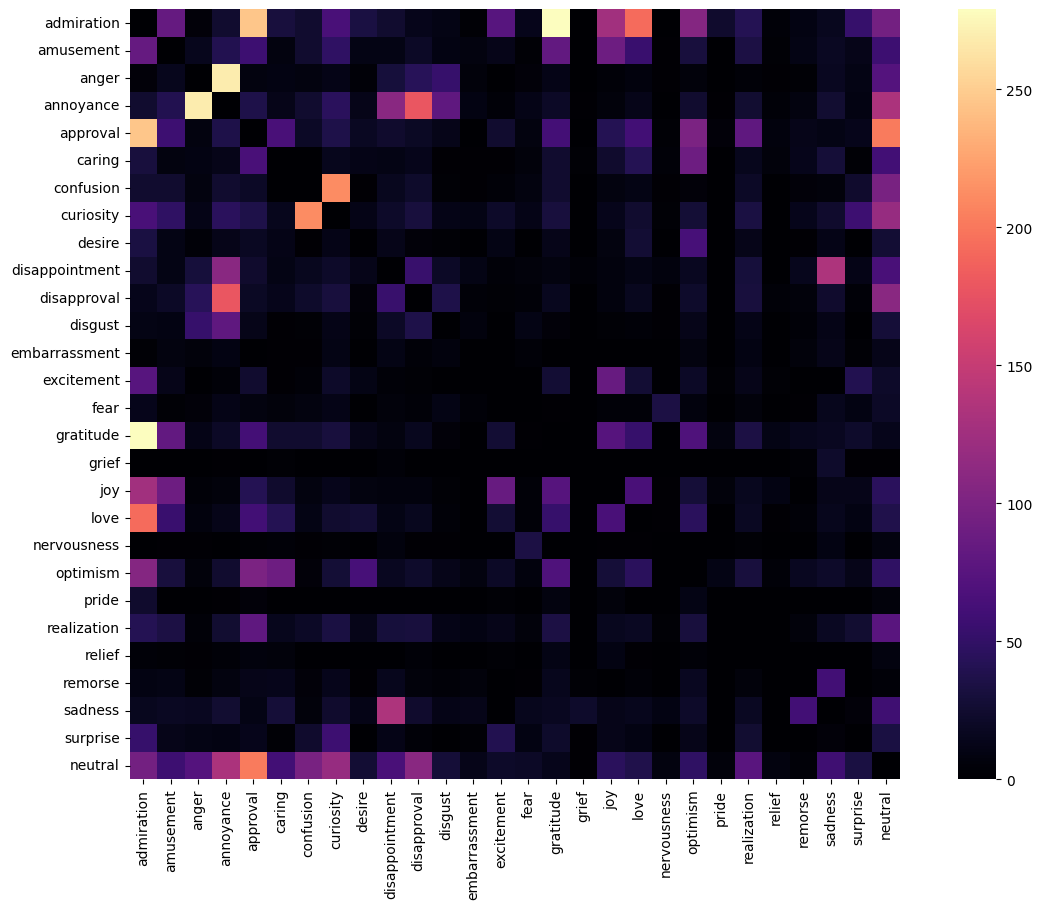

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(co_df, cmap='magma', square=True, cbar=True, xticklabels=True, yticklabels=True)
plt.show()

In [39]:
df['num_words'] = df['text'].apply(lambda x: len(x.split(" ")))

In [40]:
df.head()

,text,labels,id,num_words
0,My favourite food is anything I didn't have to...,[27],eebbqej,11
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,20
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,6
3,To make her feel threatened,[14],ed7ypvh,5
4,Dirty Southern Wankers,[3],ed0bdzj,3


In [41]:
df['num_words'].describe()

count    43410.000000
mean        12.903525
std          6.733289
min          1.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         33.000000
Name: num_words, dtype: float64

In [42]:
rare_threshold = 1000
rare_labels = [label for label, count in counts.items() if count < rare_threshold]

In [43]:
rare_labels

[14, 8, 12, 16, 13, 24, 11, 23, 21, 19]

In [44]:
common_labels = [label for label in range(len(label_list)) if label not in rare_labels]
common_labels

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 15, 17, 18, 20, 22, 25, 26, 27]

In [45]:
type(df['labels'].loc[3])

list

In [48]:
rare_idx = df[df['labels'].apply(lambda x: any(l in rare_labels for l in x))].index
df_rare = df.loc[rare_idx].copy()

In [49]:
df_rare.shape

(4132, 4)

In [50]:
all_rare_labels = [l for sublist in df_rare['labels'] for l in sublist]
count_rare = Counter(all_rare_labels)
for idx, c in count_rare.items():
    print(label_list[idx],c)

fear 596
desire 641
optimism 140
annoyance 132
embarrassment 303
grief 77
sadness 137
neutral 135
curiosity 81
excitement 853
gratitude 81
admiration 170
remorse 545
joy 115
disgust 793
love 69
relief 153
approval 92
pride 111
disapproval 65
surprise 57
nervousness 164
anger 74
realization 58
disappointment 76
amusement 58
caring 49
confusion 27


In [ ]:
df_rare['num_words'].describe()

count    4132.000000
mean       13.263069
std         6.600893
min         1.000000
25%         8.000000
50%        13.000000
75%        18.000000
max        30.000000
Name: mum_words, dtype: float64

In [ ]:
df_rare.drop(columns=['id', 'num_words'], inplace=True)
df_rare.to_csv("go_emotions_rare.csv", index=False)

# REPORT 
### Preprocessing steps needed before starting of finetuning:
1. Needs lower casing.
2. Contains emojis! 
3. Names of persons, users are represented as [NAME], [USER], etc..

### Attention Required :
Extreme Rare Labels-
1. grief 77
2. pride 111
3. relief 153
4. nervousness 164
5. embaressment 303
6. fear 596
7. desire 641
8. disgust 793

The rare labels counts needs to be increased - data collection for these labels is required. 

Rare labels occuring together in the data:
1. fear and nervousness, fear and disgust
2. desire and optimism, desire and love, desire and admiration
3. grief and sadness
4. remorse and sadness, remorse and disappontment,
5. relief and gratitude, relief and joy
6. disgust and annoyance, disgust and anger, disgust and approval
7. pride and admiration, pride and optimism
8. embaressment and sadness, embarassment and realization

In all_rare_labels shown above some extra columns like 'sadness' has comeup although they have many samples because the labels have multiple categories and so 'sadness' comes up with 'grief' togther. Hence columns like sadness, neutral are there.

### Actions
Generate rare labels data from GPT/Gemini/Claude : \
PROMPT - "Generate Reddit/Twitter style comments expressing grief and sadness about some real life incidents or scenarios. Keep it informal, use internet slangs and optionally add emojis. Maximum 20 words allowed and a minimum of 5 words to be present in the comments. Focus on making it realistic as if a real user wrote."

### Labels List (Numeric Representation in the Dataset) : :

admiration - 0 \
amusement - 1 \
anger - 2 \
annoyance  - 3 

approval - 4 \
caring - 5 \
confusion - 6 \
curiosity - 7 \
desire - 8 \
disappointment - 9 \
disapproval - 10 \
disgust - 11 \
embarrassment - 12 \
excitement - 13 \
fear - 14 \
gratitude - 15 \
grief - 16 \
joy - 17 \
love - 18 \
nervousness - 19 \
optimism - 20 \
pride - 21 \
realization - 22 \
relief - 23 \
remorse - 24 \
sadness - 25 \
surprise - 26 \
neutral - 27 

In [1]:
import pandas as pd
df_rare = pd.read_csv("go_emotions_rare.csv")

In [2]:
# parse labels
def parse_labels(x):
    if isinstance(x, float) and pd.isna(x):
        return []
    x = x.strip("[]")
    # Split by comma, then strip spaces and filter out empty strings
    return [int(label.strip()) for label in x.split(",") if label.strip()]

df_rare['labels'] = df_rare['labels'].apply(parse_labels)

In [5]:
from collections import Counter
all_rare_labels = [l for sublist in df_rare['labels'] for l in sublist]
count_rare = Counter(all_rare_labels)
for idx, c in count_rare.items():
    print(label_list[idx],c)

fear 660
desire 642
optimism 140
annoyance 136
embarrassment 303
grief 304
sadness 243
neutral 140
curiosity 81
excitement 855
gratitude 91
admiration 170
remorse 545
joy 165
disgust 812
love 69
relief 244
approval 99
pride 111
disapproval 65
surprise 57
nervousness 264
anger 74
realization 58
disappointment 78
amusement 58
caring 76
confusion 33


# EMO PILLAR CONTEXT-LESS

In [1]:
import pandas as pd

emo_data = pd.read_json("data/emo_pillar_context_less_train.jsonl", lines=True)

In [2]:
emo_data.head()

,plot_id,utterance,labels,expressiveness,primary_emotion,all_emotions,all_emotions_mapped,emotions_used_to_generate_context,raw_emotion_explication
0,356,He's right. We have become heartless. We need ...,"[22, 25, 24, 2]","[1.0, 0.8, 0.9, 0.4]",realization,"[[realization, 1.0], [sadness, 0.8], [compassi...","[[realization, 1.0], [sadness, 0.8], [remorse,...","[realization, sadness, remorse, anger]",1. realization: 1.0\n2. sadness: 0.8\n3. compa...
1,9,I need to think carefully about my next move.,[27],[0.8],neutral,"[[neutral, 0.8], [nervousness, 0.2], [confusio...","[[neutral, 0.8], [nervousness, 0.2], [confusio...",[neutral],1. neutral: 0.8\n2. nervousness: 0.2\n3. confu...
2,20,"The filter is almost ready, we just need to fi...","[27, 13]","[0.5, 0.30000000000000004]",neutral,"[[neutral, 0.5], [excitement, 0.30000000000000...","[[neutral, 0.5], [excitement, 0.30000000000000...","[neutral, excitement]",1. neutral: 0.5\n2. excitement: 0.3\n3. antici...
3,5,What's going on? Why are we retreating? We wer...,"[6, 3, 9, 2, 19]","[1.0, 0.8, 0.9, 0.6000000000000001, 0.5]",confusion,"[[confusion, 1.0], [frustration, 0.8], [disapp...","[[confusion, 1.0], [annoyance, 0.8], [disappoi...","[confusion, annoyance, disappointment, anger, ...",1. confusion: 1.0\n2. frustration: 0.8\n3. dis...
4,92,I hope we can make it back to the Protector in...,"[8, 20]","[1.0, 0.9]",desire,"[[desire, 1.0], [hope, 0.9], [fear, 0.1], [exc...","[[desire, 1.0], [optimism, 0.9], [fear, 0.1], ...","[desire, optimism]",1. desire: 1.0\n2. hope: 0.9\n3. fear: 0.1 (lo...


In [10]:
x = emo_data['emotions_used_to_generate_context'].loc[0]

In [12]:
emo_data["utterance"].isnull().sum()


np.int64(0)

In [10]:
emo_data.head(5)

,plot_id,utterance,labels,expressiveness,primary_emotion,all_emotions,all_emotions_mapped,emotions_used_to_generate_context,raw_emotion_explication
0,356,He's right. We have become heartless. We need ...,"[22, 25, 24, 2]","[1.0, 0.8, 0.9, 0.4]",realization,"[[realization, 1.0], [sadness, 0.8], [compassi...","[[realization, 1.0], [sadness, 0.8], [remorse,...","[realization, sadness, remorse, anger]",1. realization: 1.0\n2. sadness: 0.8\n3. compa...
1,9,I need to think carefully about my next move.,[27],[0.8],neutral,"[[neutral, 0.8], [nervousness, 0.2], [confusio...","[[neutral, 0.8], [nervousness, 0.2], [confusio...",[neutral],1. neutral: 0.8\n2. nervousness: 0.2\n3. confu...
2,20,"The filter is almost ready, we just need to fi...","[27, 13]","[0.5, 0.30000000000000004]",neutral,"[[neutral, 0.5], [excitement, 0.30000000000000...","[[neutral, 0.5], [excitement, 0.30000000000000...","[neutral, excitement]",1. neutral: 0.5\n2. excitement: 0.3\n3. antici...
3,5,What's going on? Why are we retreating? We wer...,"[6, 3, 9, 2, 19]","[1.0, 0.8, 0.9, 0.6000000000000001, 0.5]",confusion,"[[confusion, 1.0], [frustration, 0.8], [disapp...","[[confusion, 1.0], [annoyance, 0.8], [disappoi...","[confusion, annoyance, disappointment, anger, ...",1. confusion: 1.0\n2. frustration: 0.8\n3. dis...
4,92,I hope we can make it back to the Protector in...,"[8, 20]","[1.0, 0.9]",desire,"[[desire, 1.0], [hope, 0.9], [fear, 0.1], [exc...","[[desire, 1.0], [optimism, 0.9], [fear, 0.1], ...","[desire, optimism]",1. desire: 1.0\n2. hope: 0.9\n3. fear: 0.1 (lo...


In [15]:
emo_data["utterance_len"] = emo_data["utterance"].apply(lambda x: len(x.split(" ")))

In [19]:
m = emo_data["utterance_len"].to_list()

In [21]:
max(m)

39

In [18]:
emo_data["utterance"].loc[1]

'I need to think carefully about my next move.'

In [ ]:
emo_data["all_emotions_mapped"].loc[0]

[['realization', 1.0],
 ['sadness', 0.8],
 ['remorse', 0.6000000000000001],
 ['anger', 0.4],
 ['remorse', 0.9]]

In [11]:
emo_data.shape

(14052, 9)